In [1]:
import cv2
import numpy as np
import pytesseract
from pytesseract import image_to_string
import os
import re
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe" # CHANGE THIS to your own location of tesseract.exe

# 1. Crop video

Done in Handbrake

# 2. Break up videos into frames

In [13]:
path = r'.\CPM vs time data 2\1_time.mp4'

cap = cv2.VideoCapture(path)
success,image = cap.read()
print(success)
count = 0
while success:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000)) 
    cv2.imwrite(".\\CPM vs time data 2\\timeframes\\frame%d.png" % count, image)
    success,image = cap.read()
    print('Read a new frame: ', success)
    count += 1

True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new 

In [16]:
path = r'.\CPM vs time data 2\1_CPM.mp4'
newpath=r'.\CPM vs time data 2\CPMframes'
if not os.path.exists(newpath):
    os.makedirs(newpath)

cap = cv2.VideoCapture(path)
success,image = cap.read()
print(success)
count = 0
while success:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000)) 
    cv2.imwrite(".\\CPM vs time data 2\\CPMframes\\frame%d.png" % count, image)
    success,image = cap.read()
    print('Read a new frame: ', success)
    count += 1

True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new 

# 3. Extract text from videos

In [2]:
def getNumbers(filename):
    # extracts ONLY digits from the frame
    
    img = cv2.imread(filename)
    HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(HSV_img)
    v = cv2.GaussianBlur(v, (1,1), 0)
    thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #cv2.imwrite('{}.png'.format(filename),thresh)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(1, 2))
    thresh = cv2.dilate(thresh, kernel)
    txt = image_to_string(thresh, config="psm=6 tessedit_char_whitelist=0123456789")
    newtxt = re.sub("[^0-9]", "", txt)

    if newtxt=='':
        #print("Detected no text")
        return np.nan
        
    return int(newtxt)

def getTime(filename):
    # extracts the time in seconds from the frame
    
    img = cv2.imread(filename)
    HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(HSV_img)
    v = cv2.GaussianBlur(v, (1,1), 0)
    thresh = cv2.threshold(v, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    #cv2.imwrite('{}.png'.format(filename),thresh)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ksize=(1, 1)) #smallest kernel size possible for detecting small structures
    thresh = cv2.dilate(thresh, kernel)
    txt = image_to_string(thresh, config="psm=6 tessedit_char_whitelist=0123456789") #raw text detected
    time = re.sub("[^0-9:]", "", txt) #clean it up so it's just digits and colons
    
    if not time: return np.nan # handle case where no time is detected
    
    seconds = sum(x * int(t) for x, t in zip([60, 60, 1], time.split(":"))) 
    
    return seconds

In [5]:
getNumbers(r"C:\Users\yuliy\OneDrive\Documents\Fall 2023\Research\counting_time\processed_data\7\cpmframes\frame4.png")

38474

# 4. Produce list of values for both videos

In [7]:
time_dir = r".\processed_data\7\7_time.mp4"
directory = os.fsencode(time_dir)
print(directory)

n = len(os.listdir(directory))
data = np.zeros(shape=(n, 2))

i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".png"): 
        data[i, 1] = getTime(time_dir + "\\" + filename) # stores the time in seconds
        data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can keep track
        i+=1
        continue
       
    else:
        continue

time_data = data[data[:, 0].argsort(),1]
# I dont know what this problem is. womp womp
# TODO next time


b'.\\processed_data\\7\\7_time.mp4'


NotADirectoryError: [WinError 267] The directory name is invalid: b'.\\processed_data\\7\\7_time.mp4'

In [186]:
## do the same for CPM data
cpm_dir = r".\\CPM vs time data 2\\CPMframes"
directory = os.fsencode(cpm_dir)

m = len(os.listdir(directory))
assert(m == n, "Not the same number of frames between time and CPM data")
data = np.zeros(shape=(m, 2))

i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    
    if filename.endswith(".png"): 
        data[i, 1] = getNumbers(cpm_dir + "\\" + filename) # stores the time in seconds
        data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can keep track
        i+=1
        continue
       
    else:
        continue

cpm_data = data[data[:, 0].argsort(), 1]

<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\yuliy\AppData\Local\Temp\ipykernel_14324\733710777.py:6: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(m == n, "Not the same number of frames between time and CPM data")


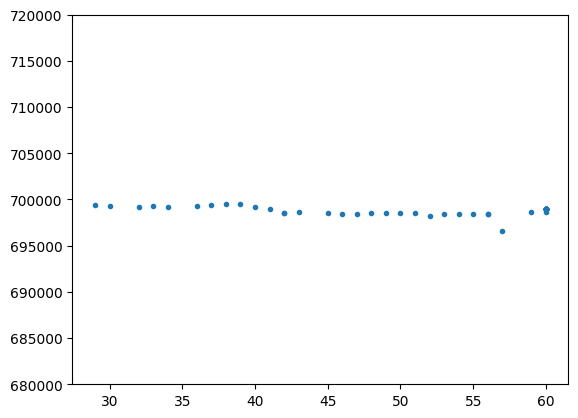

In [192]:
plt.plot(time_data, cpm_data, ".")
plt.ylim(680000, 720000)
plt.show()

# Collect all the functions

In [195]:
def break_into_frames(in_path, destination):
    # destination must have a trailing slash
    if not os.path.exists(destination):
        os.makedirs(destination)
        
    cap = cv2.VideoCapture(in_path)
    success,image = cap.read()
    #print(success)
    count = 0
    while success:
        cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000)) 
        cv2.imwrite(destination + "frame%d.png" % count, image)
        success,image = cap.read()
        #print('Read a new frame: ', success)
        count += 1
    return True

In [209]:
for n in range(1,9):
    print("Processing vial " + str(n))
    # timer part
    path = f"./processed_data/{n}/{n}_time.mp4"
    output = f"./processed_data/{n}/timeframes/"
    
    break_into_frames(path, output)
    # CPM part
    path = f"./processed_data/{n}/{n}_cpm.mp4"
    output = f"./processed_data/{n}/cpmframes/"
    
    break_into_frames(path, output)

Processing vial 1
Processing vial 2
Processing vial 3
Processing vial 4
Processing vial 5
Processing vial 6
Processing vial 7
Processing vial 8


In [201]:
def getTimeSeries(time_dir):
    # time_dir is the folder containing all the png images of the frames of the time counter

    directory = os.fsencode(time_dir)

    n = len(os.listdir(directory))
    data = np.zeros(shape=(n, 2))
    
    i = 0
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".png"): 
            data[i, 1] = getTime(time_dir + "\\" + filename) # stores the time in seconds
            data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can sort in order later
            i+=1
            continue
        else:
            continue
    
    time_data = data[data[:, 0].argsort(),1]
    return time_data

def getCPMSeries(cpm_dir):
    directory = os.fsencode(cpm_dir)
    
    m = len(os.listdir(directory))
    #assert(m == n, "Not the same number of frames between time and CPM data")
    data = np.zeros(shape=(m, 2))
    
    i = 0
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        
        if filename.endswith(".png"): 
            data[i, 1] = getNumbers(cpm_dir + "\\" + filename) # stores the time in seconds
            data[i, 0] = re.sub("[^0-9]", "", filename) # stores the frame number so that we can sort in order
            i+=1
            continue
           
        else:
            continue
    
    cpm_data = data[data[:, 0].argsort(), 1]
    return cpm_data

Processing vial 1
Time series finished.
CPM finished.
Processing vial 2
Time series finished.
CPM finished.
Processing vial 3
Time series finished.
CPM finished.
Processing vial 4
Time series finished.
CPM finished.
Processing vial 5
Time series finished.
CPM finished.
Processing vial 6
Time series finished.
CPM finished.
Processing vial 7
Time series finished.
CPM finished.
Processing vial 8
Time series finished.
CPM finished.


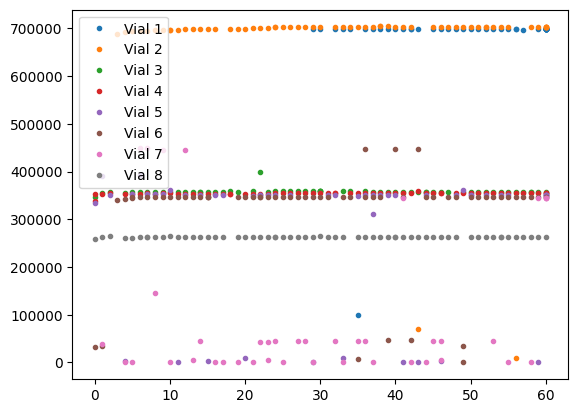

In [212]:
plt.figure()
for n in [1,2,3,4,5,6,7,8]:
    print("Processing vial " + str(n))
    time_dir = f"./processed_data/{n}/timeframes/"
    cpm_dir = f"./processed_data/{n}/cpmframes/"

    time = getTimeSeries(time_dir)
    print("Time series finished.")
    cpm = getCPMSeries(cpm_dir)
    print("CPM finished.")

    if len(cpm) > len(time):
        cpm = cpm[:len(time)]
    
    plt.plot(time, cpm, ".", label="Vial " + str(n))

plt.legend()


In [ ]:
plt.show()